In [8]:
%pylab inline

import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Introduction

ANOVA는 Analysis of Variance의 약자로서, 2개 이상의 그룹의 평균을 비교하고자 할때 Anova를 사용합니다.<br>
T-test와 유사한데 차이는 T-test는 2개의 그룹일때만 사용하고, 2개 이상일때는 ANOVA를 사용합니다.

* Tests 
  * Continuous VS Category : ANOVA 사용
  * Category VS Category : Chi-sqaure test 사용
 
* Effect Size (얼마나 관련성이 있는지..) 
  * Continous VS Category: intraclass correlation 사용
  * Category VS Category: Cramer's V 사용

* One-way ANOVA
  * 모든 그룹의 평균값은 동일한가? (예. 연령별 (20대, 30대, 40대, 50대) 에서 커피에 대한 선호도 차이 유무를 검정
  * t-test와 유사하지만, 2개 이상의 그룹을 비교할때 사용할 수 있다. (t-test는 2개만 가능)
  

# ANOVA 

## Grand Mean

$$ \mu_{GM} = \frac{\sum x}{N} = \frac{\sum n \bar{x}}{\sum n} $$

ANOVA에서는 2종류의 평균값이 사용이 됩니다. <br>
첫번째는 각 그룹들의 표본평균 $ \mu_1, \mu_2, \mu_3, ... $  그리고 **grand mean** $ \mu $ 를 사용합니다. <br>
grand mean은 각각의 표본평균들에 대한 평균값이라고 보면 됩니다. 



## Null Hypothesis 

* $ H_0 $ : $ \mu_1 = \mu_2 = .. = \mu_k $ 즉 귀무가설은 모든 그룹의 평균은 정확하게 일치한다 있다. 
* $ H_A $ : $ \mu_l \ne \mu_m $ : 최소한 한개의 그룹은 $ \mu_i $ 는 나머지 그룹과 다은 평균값을 갖고 있다.


$ \mu $ 는 해당 그룹의 평균이고, k는 그룹의 갯수입니다. <br>
$ \mu_l $ 그리고 $ \mu_m $ 은 전체 샘플 중에 아무거나 특정 표본평균을 뜻 합니다.


## Between Group Variability

아래의 두 표본의 분포를 보면, 서로 겹치는 부분이 있습니다. 각각의 표본평균과 grand mean의 차이는 크지 않을 것 입니다.

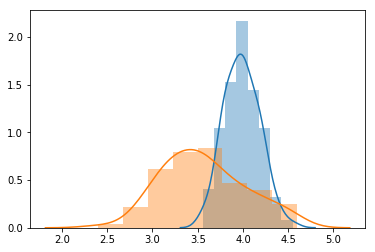

In [48]:
def plot_normal_dist(means, sigmas):
    for i, (sample_mean, sigma) in enumerate(zip(means, sigmas)):
        normal_data = np.random.normal(sample_mean, scale=sigma, size=100)
        sns.distplot(normal_data)

means = [4, 3.5]
sigmas = [0.2, 0.5]
plot_normal_dist(means, sigmas)


반면에 아래의 두 표본분포를 서로 크게 떨어져 있습니다. 이 경우 각각의 표본 평균과 grand mean은 서로 크게 차이가 날 것입니다. 

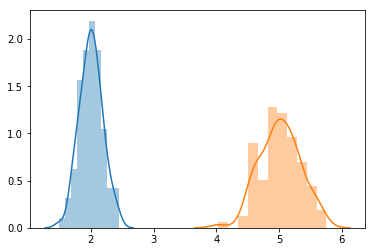

In [50]:
plot_normal_dist([2, 5], [0.2, 0.3])

이렇게 각 표본분포간의 차이를 **Between-group variability** 라고 합니다. 

한발 더 나가서, 

In [6]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

moore = sm.datasets.get_rdataset("Moore", "car", cache=True)

data = moore.data
data = data.rename(columns={"partner.status" :"partner_status"})  # make name pythonic

moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)', data=data).fit()
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame

print(table)

ValueError: Dataset Moore was not found.